In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
df = pd.read_csv('train_dataset_full.csv')
# Load df_test
df_test = pd.read_csv('X_test_1st.csv')
df.head()


,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
0,98528.0,2017-07-04 16:42,7716.0,C,405490.0,60305.0,3.0,NaN,3.0,Male,3.0,3.0,NaN,1.0,1.0
1,589714.0,2017-07-07 07:40,1035283.0,I,118601.0,28529.0,4.0,82527.0,10.0,Female,4.0,3.0,3.0,1.0,0.0
2,478652.0,2017-07-07 20:42,65994.0,H,359520.0,13787.0,4.0,NaN,4.0,Male,4.0,3.0,2.0,0.0,0.0
3,34536.0,2017-07-05 15:05,75976.0,H,405490.0,60305.0,3.0,NaN,3.0,Male,3.0,3.0,3.0,0.0,0.0
4,71863.0,2017-07-06 20:11,987498.0,C,405490.0,60305.0,3.0,NaN,2.0,Male,2.0,3.0,2.0,0.0,0.0


In [4]:

# Create a copy of df_
df_ = df.copy()

# Add an identifier column to track original source
df_['source'] = 'train'  # Mark df_ rows
df_test['source'] = 'test'  # Mark df_test rows

# Concatenate the DataFrames
pd_concat = pd.concat([df_, df_test], ignore_index=True)

# Fill missing values using forward & backward fill
labels = ['gender', 'age_level', 'city_development_index', 'user_group_id']
pd_concat[labels] = pd_concat.groupby('user_id')[labels].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
pd_concat['user_group_id'] = np.where(pd_concat['gender'] == 'Male', pd_concat['age_level'], pd_concat['age_level'] + 6)
mapping_dict = df.dropna().set_index('webpage_id')['campaign_id'].to_dict()
df['campaign_id'] = df['campaign_id'].fillna(df['webpage_id'].map(mapping_dict))


# Split them back based on the 'source' column
df_ = pd_concat[pd_concat['source'] == 'train'].drop(columns=['source']).reset_index(drop=True)
df_test = pd_concat[pd_concat['source'] == 'test'].drop(columns=['source']).reset_index(drop=True)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389163 entries, 0 to 389162
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   session_id              384997 non-null  float64
 1   DateTime                385054 non-null  object 
 2   user_id                 385055 non-null  float64
 3   product                 384989 non-null  object 
 4   campaign_id             386364 non-null  float64
 5   webpage_id              385006 non-null  float64
 6   product_category_1      384962 non-null  float64
 7   product_category_2      80928 non-null   float64
 8   user_group_id           369844 non-null  float64
 9   gender                  369839 non-null  object 
 10  age_level               369854 non-null  float64
 11  user_depth              369841 non-null  float64
 12  city_development_index  281026 non-null  float64
 13  var_1                   385002 non-null  float64
 14  is_click            

In [6]:
# df_.drop('product_category_2', axis = 1, inplace = True)
# df_.drop('webpage_id', axis=1, inplace=True)
df_.drop(['webpage_id','age_level','gender','product_category_2','user_depth'], axis=1, inplace=True)
df = df_[~df_['session_id'].duplicated(keep='first') | df_['session_id'].isna()]
df_.dropna(subset=['is_click'], axis=0, inplace=True)
# labels = ['gender', 'age_level', 'city_development_index', 'user_group_id']
# df[labels] = df_.groupby('user_id')[labels].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
df = df_.dropna(thresh=len(df.columns) - 5)


In [7]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 385031 entries, 0 to 389162
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   session_id              383605 non-null  float64
 1   DateTime                383629 non-null  object 
 2   user_id                 383670 non-null  float64
 3   product                 383636 non-null  object 
 4   campaign_id             383606 non-null  float64
 5   product_category_1      383670 non-null  float64
 6   user_group_id           368449 non-null  float64
 7   city_development_index  279949 non-null  float64
 8   var_1                   383626 non-null  float64
 9   is_click                385031 non-null  float64
dtypes: float64(8), object(2)
memory usage: 32.3+ MB


In [9]:
df_['DateTime'] = pd.to_datetime(df_['DateTime'])
df_['day'] = df_['DateTime'].dt.day
df_['hour'] = df_['DateTime'].dt.hour

In [10]:
df_.head()

,session_id,DateTime,user_id,product,campaign_id,product_category_1,user_group_id,city_development_index,var_1,is_click,day,hour
0,98528.0,2017-07-04 16:42:00,7716.0,C,405490.0,3.0,3.0,NaN,1.0,1.0,4.0,16.0
1,589714.0,2017-07-07 07:40:00,1035283.0,I,118601.0,4.0,10.0,3.0,1.0,0.0,7.0,7.0
2,478652.0,2017-07-07 20:42:00,65994.0,H,359520.0,4.0,4.0,2.0,0.0,0.0,7.0,20.0
3,34536.0,2017-07-05 15:05:00,75976.0,H,405490.0,3.0,3.0,3.0,0.0,0.0,5.0,15.0
4,71863.0,2017-07-06 20:11:00,987498.0,C,405490.0,3.0,2.0,2.0,0.0,0.0,6.0,20.0


In [11]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Target variable
y = df_['is_click']
X = df_.drop(['is_click', 'DateTime', 'user_id', 'session_id'], axis=1)

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# Define categorical and numerical features
categorical_features = ['campaign_id', 'product_category_1', 'user_group_id', 'product','city_development_index', 'var_1']
# numerical_features = []

# Ensure categorical features are strings
for col in categorical_features:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)

# Convert numerical features to numeric & handle missing values
# for col in numerical_features:
#     X_train[col] = pd.to_numeric(X_train[col], errors='coerce')  # Convert invalid values to NaN
#     X_test[col] = pd.to_numeric(X_test[col], errors='coerce')

# # Fill missing numerical values with median (safe for skewed data)
# X_train[numerical_features] = X_train[numerical_features].fillna(X_train[numerical_features].median())
# X_test[numerical_features] = X_test[numerical_features].fillna(X_test[numerical_features].median())

# Ensure y_train and y_test are clean
y_train = y_train.fillna(0).astype(int)
y_test = y_test.fillna(0).astype(int)

# Create CatBoost Pool (optimized format)
train_pool = Pool(X_train, label=y_train, cat_features=categorical_features)
test_pool = Pool(X_test, label=y_test, cat_features=categorical_features)

# Print data information
print(f"Train Shape: {X_train.shape}, Test Shape: {X_test.shape}")
print(f"Class Distribution in Train: {np.bincount(y_train)}")
print(f"Class Distribution in Test: {np.bincount(y_test)}")


Train Shape: (308024, 8), Test Shape: (77007, 8)
Class Distribution in Train: [287209  20815]
Class Distribution in Test: [71803  5204]


In [12]:
# Define CatBoost train and test pools
train_pool = Pool(X_train, label=y_train, cat_features=categorical_features)
test_pool = Pool(X_test, label=y_test, cat_features=categorical_features)  # <-- Ensure test labels are included

class_counts = np.bincount(y_train)
print(f"Class 0 Count: {class_counts[0]}, Class 1 Count: {class_counts[1]}")
print(f"Class Imbalance Ratio: {class_counts[1] / class_counts[0]:.4f}")


scale_pos_weight = class_counts[0] / class_counts[1] 


# Train the CatBoost model
model = CatBoostClassifier(
    iterations=1024,  # More iterations for deeper learning
    learning_rate=0.01,  # Reduce learning rate to avoid overfitting
    depth=10,  # Increase depth for more complex patterns
    scale_pos_weight=scale_pos_weight,  # Handle imbalance
    loss_function='Logloss',  
    eval_metric='AUC',  
    bagging_temperature=0.8444,
    l2_leaf_reg = 1,
    use_best_model=True,  
    early_stopping_rounds=100,  # Give the model more time to improve
    verbose=100
)

model.fit(train_pool, eval_set=test_pool, early_stopping_rounds=100)


Class 0 Count: 287209, Class 1 Count: 20815
Class Imbalance Ratio: 0.0725
0:	test: 0.5598023	best: 0.5598023 (0)	total: 126ms	remaining: 2m 9s
100:	test: 0.5850322	best: 0.5851042 (97)	total: 8.64s	remaining: 1m 18s
200:	test: 0.5871914	best: 0.5871914 (200)	total: 18.8s	remaining: 1m 17s
300:	test: 0.5885069	best: 0.5885069 (300)	total: 30.1s	remaining: 1m 12s
400:	test: 0.5895998	best: 0.5895998 (399)	total: 39.8s	remaining: 1m 1s
500:	test: 0.5898187	best: 0.5898584 (495)	total: 49.6s	remaining: 51.8s
600:	test: 0.5900529	best: 0.5900661 (587)	total: 59.2s	remaining: 41.7s
700:	test: 0.5901711	best: 0.5903275 (688)	total: 1m 8s	remaining: 31.8s
800:	test: 0.5903113	best: 0.5904197 (783)	total: 1m 18s	remaining: 21.9s
900:	test: 0.5903886	best: 0.5904887 (861)	total: 1m 26s	remaining: 11.8s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.590488673
bestIteration = 861

Shrink model to first 862 iterations.


In [18]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred, digits=3)
print(report)

              precision    recall  f1-score   support

           0      0.944     0.626     0.753     71803
           1      0.087     0.490     0.147      5204

    accuracy                          0.617     77007
   macro avg      0.516     0.558     0.450     77007
weighted avg      0.886     0.617     0.712     77007



              precision    recall  f1-score   support

           0      0.945     0.625     0.752     71803
           1      0.087     0.496     0.149      5204

    accuracy                          0.616     77007
   macro avg      0.516     0.561     0.450     77007
weighted avg      0.887     0.616     0.711     77007



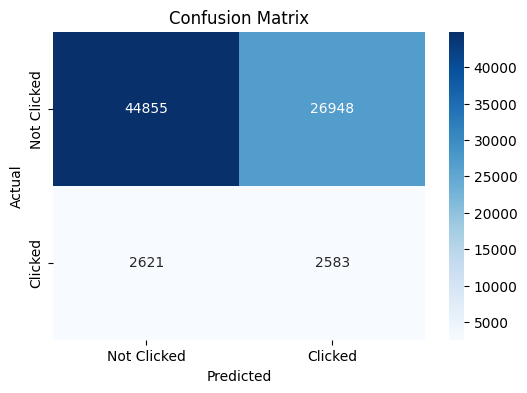

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions
y_pred = model.predict(X_test)

# Classification Report
report = classification_report(y_test, y_pred, digits=3)
print(report)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Clicked", "Clicked"], yticklabels=["Not Clicked", "Clicked"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [37]:
from sklearn.metrics import balanced_accuracy_score
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy:", balanced_acc)


Balanced Accuracy: 0.5605221546638685


In [14]:
from skopt import BayesSearchCV

# Define search space
param_space = {
    'iterations': (500, 2000),
    'learning_rate': (0.01, 0.1, 'log-uniform'),
    'depth': (4, 10),
    'l2_leaf_reg': (1, 10, 'log-uniform'),
    'bagging_temperature': (0.0, 1.0)
}

# Create CatBoost model
model = CatBoostClassifier(loss_function='Logloss', cat_features=categorical_features, verbose=0)

# Perform Bayesian Optimization
bayes_search = BayesSearchCV(model, param_space, n_iter=20, scoring='roc_auc', cv=3, n_jobs=-1, random_state=42)
bayes_search.fit(X_train, y_train)

# Get best parameters
print("Best Parameters:", bayes_search.best_params_)
print("Best Score:", bayes_search.best_score_)


Best Parameters: OrderedDict([('bagging_temperature', 0.844473363244577), ('depth', 10), ('iterations', 1024), ('l2_leaf_reg', 1), ('learning_rate', 0.01)])
Best Score: 0.5838178214454784


In [20]:
from skopt import BayesSearchCV
from sklearn.metrics import f1_score, make_scorer
from catboost import CatBoostClassifier

# Define a custom F1-score scorer for Class 1
f1_scorer = make_scorer(f1_score, pos_label=1)

# Define the parameter space
param_space = {
    'iterations': (500, 2000),
    'learning_rate': (0.01, 0.1, 'log-uniform'),
    'depth': (4, 10),
    'l2_leaf_reg': (1, 10, 'log-uniform'),
    'bagging_temperature': (0.0, 1.0)
}

# Create the CatBoost model
model = CatBoostClassifier(loss_function='Logloss', cat_features=categorical_features, verbose=0)

# Perform Bayesian Optimization with Class 1 F1-score
bayes_search = BayesSearchCV(
    model, param_space, n_iter=20, scoring=f1_scorer, cv=3, n_jobs=-1, random_state=42
)

# Fit the search
bayes_search.fit(X_train, y_train)

# Get best parameters
print("Best Parameters:", bayes_search.best_params_)
print("Best Class 1 F1-Score:", bayes_search.best_score_)


Best Parameters: OrderedDict([('bagging_temperature', 0.0905162849522655), ('depth', 5), ('iterations', 1125), ('l2_leaf_reg', 2), ('learning_rate', 0.042162528344533996)])
Best Class 1 F1-Score: 0.00019212295869356388


                  Feature  Importance
1             campaign_id   18.741457
0                 product   14.216836
2      product_category_1   13.727633
3           user_group_id   13.575256
4  city_development_index   11.056639
5                   var_1   10.927386
6                     day   10.387779
7                    hour    7.367014


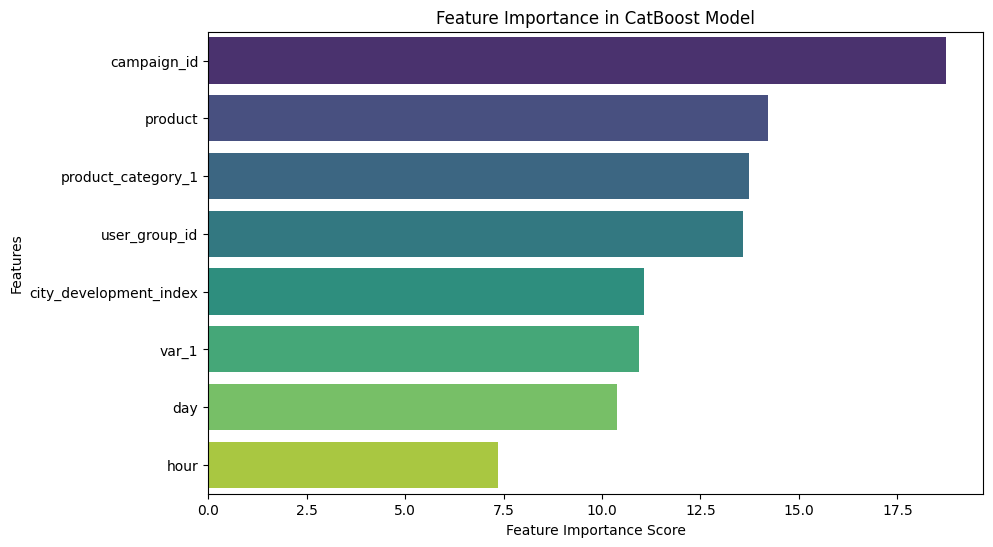

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance
feature_importance = model.get_feature_importance(train_pool)
feature_names = X_train.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Print feature importance values
print(importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"], palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in CatBoost Model")
plt.show()
